# Integral Mappings

The most important mapping for SOLA is the integral mapping such as
$$
\begin{gather}
    d = G(m) \\
    d_i = \int_{\Omega} K_i m 
\end{gather}
$$
where $d\in \mathbb{R}^N$, and $K_i, m \in PC_b[\Omega]$, and $G$ is the integral mapping.

To deal with such integral mappings we use the IntegralMapping class in mappings.py

In [1]:
import sys
sys.path.append('/disks/data/PhD/BGSOLA/SOLA_DLI/core')
from core.main_classes.mappings import IntegralMapping
from core.main_classes.spaces import PCb, RN
from core.main_classes.domains import HyperParalelipiped
from core.main_classes.functions import *
import numpy as np

To create such a mapping we need a domain, codomain, and a list of the kernels. The domain must be of type $PC_b[\Omega]$, where $\Omega$ is the domain on which the functions are defined (not to be confused with the domain of $G$, which is $PC_b[\Omega]$)

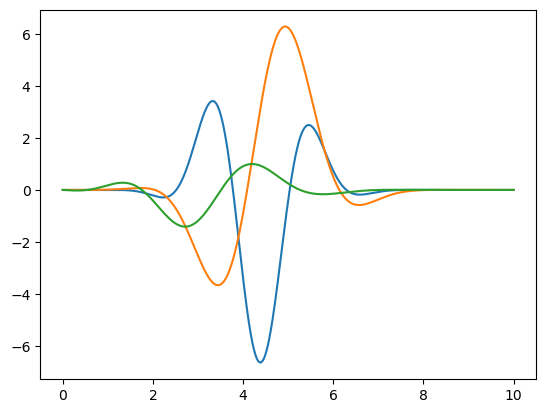

In [2]:
%matplotlib inline
# Create a domain for the functions
function_domain = HyperParalelipiped(bounds=[[0,10]], fineness=1000)
# Create the model and data space 
model_space = PCb(domain=function_domain)
data_space = RN(dimension=3)
# Create kernels and plot them
kernels = []
for index in range(data_space.dimension):
    # NormalModes_1D is a class for some functions that resemble some normal
    # modes kernels, but they are not actual normal modes kernels
    kernels.append(NormalModes_1D(domain=function_domain, 
                                  order=2, spread=1,
                                  max_freq=10, seed=index))
    plt.plot(function_domain.mesh, 
             kernels[index].evaluate(function_domain.mesh)[1])
plt.show()
G = IntegralMapping(domain=model_space, 
                    codomain=data_space, 
                    kernels=kernels)

Using our mapping we can map functions from $PC_b[[0,10]]$ into $\mathbb{R}^3$:

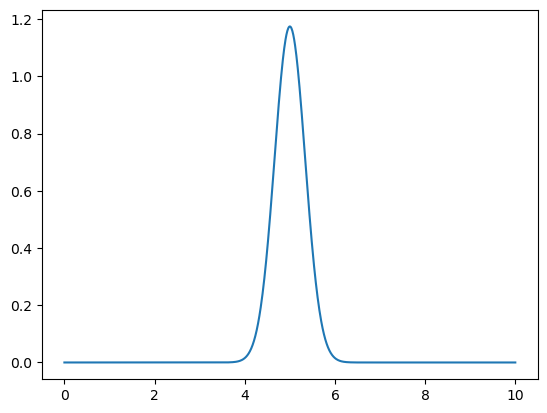

The function gets mapped to: 
 [[-1.029718  ]
 [ 5.21187261]
 [ 0.29245566]]


In [3]:
func = Gaussian_1D(domain=function_domain, center=5, width=2)
func.plot()
print('The function gets mapped to: \n', G.map(func))

This mapping does not have an inverse, but it does have an adjoint, which maps elements of $\mathbb{R}^3$ to $PC_b[[0,10]]$, and can be obtained with the .adjoint() method. The adjoint is an instance of the FunctionMapping class. A Function Mapping has the mathematical form
$$
\begin{gather}
    m = G^*(d) \\
    m(r) = \sum_i d_i K_i(r)
\end{gather}
$$
So basically, such a mapping takes a column vector and creates a function by linearly combining some kernel functions with the elements of the column vector as weights.

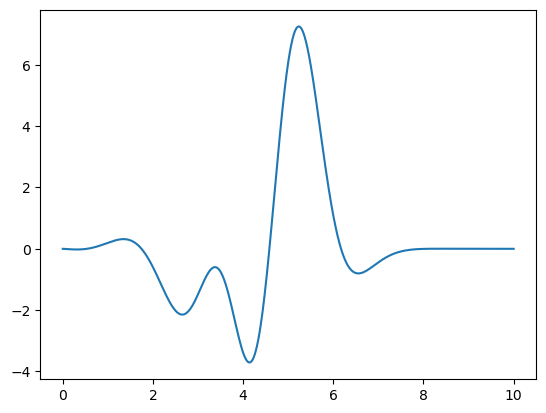

In [4]:
G_adj = G.adjoint()

vector = np.array([[1],[1],[1]])
g = G_adj.map(vector)

plt.plot(function_domain.mesh, g.evaluate(function_domain.mesh)[1])
plt.show()